# 1 Import Librerys 
Pandas and Numpy

In [1]:
import pandas as pd
import numpy as np

# 2 Read CSV lile
Review firsts lines of information, identify separator decoding type   

In [2]:
file = open('C:/Users/forqu/OneDrive/Documentos/IronHack/Github/Projetos/Shark Attack/Data/attacks.csv', 'rb')
file_lines = file.readlines(10000)
for i in range(5):
    print(file_lines[i].decode('latin-1'))
file.close()

Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex ,Age,Injury,Fatal (Y/N),Time,Species ,Investigator or Source,pdf,href formula,href,Case Number,Case Number,original order,,

2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and paddle damaged",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,2018.06.25,2018.06.25,6303,,

2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely ,F,11,Minor injury to left thigh,N,14h00  -15h00,,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf,2018.06.18,2018.06.18,6302,,

201

Read CSV file with Pandas and assigne DataSet information to a variable 

In [3]:
sharkattack=pd.read_csv('C:/Users/forqu/OneDrive/Documentos/IronHack/Github/Projetos/Shark Attack/Data/attacks.csv', sep = ',', decimal = '.', encoding = 'latin-1')

# 3 Understand DataSet 
Review information, distribution, quality, quantity of NAs

In [4]:
sharkattack.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [5]:
sharkattack.shape

(25723, 24)

In [6]:
sharkattack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

### Understand NAs distribution
understand NAs in % per columns and rows 

In [7]:
(sharkattack.isna().sum(axis = 0)/len(sharkattack)).round(2)

Case Number               0.66
Date                      0.76
Year                      0.76
Type                      0.76
Country                   0.76
Area                      0.77
Location                  0.78
Activity                  0.78
Name                      0.76
Sex                       0.78
Age                       0.87
Injury                    0.76
Fatal (Y/N)               0.78
Time                      0.89
Species                   0.87
Investigator or Source    0.76
pdf                       0.76
href formula              0.76
href                      0.76
Case Number.1             0.76
Case Number.2             0.76
original order            0.75
Unnamed: 22               1.00
Unnamed: 23               1.00
dtype: float64

In [8]:
(sharkattack.isna().sum(axis = 1)/len(sharkattack.columns)).describe().round(2)

count    25723.00
mean         0.79
std          0.36
min          0.08
25%          0.96
50%          1.00
75%          1.00
max          1.00
dtype: float64

This DataSet hav a significantnumbers of NAs, in mean 79% of values eather in rows or columns are Nas  

# 4 Cleaning DataSet
Process NAs in Columns and  Rows

### Review unnamed columns

In [9]:
sharkattack['Unnamed: 22'].value_counts()

stopped here    1
Name: Unnamed: 22, dtype: int64

In [10]:
sharkattack['Unnamed: 23'].value_counts()

Teramo             1
change filename    1
Name: Unnamed: 23, dtype: int64

### Drop Unamed columns 
As unamed columns not have only one row of information and is not usful information 

In [11]:
sharkattack = sharkattack.drop(['Unnamed: 22','Unnamed: 23'],  axis=1)

### Drop Rows 
Drop Rows with more that 20% of NAs in them  

In [12]:
sharkattack = sharkattack.dropna(axis=0, thresh= int(len(sharkattack.columns) * 0.20))
sharkattack.isna().sum() # Count NAs per Column

Case Number                  1
Date                         0
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
dtype: int64

In [13]:
sharkattack.shape

(6302, 22)

After proccess the NAs we go form a Large Datasets fill with NAs with 25723 rows and 24 Columns to a cleaner Dataset with 6302 Rows and 22 Columns.

### Process Column Names
Treat spaces, special characters, and standarize Column Names 

In [14]:
sharkattack.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [15]:
sharkattack.columns = [column.lower().replace(' ', '_').replace('(', '').replace(')', '').replace('.', '_') for column in sharkattack.columns]
sharkattack = sharkattack.rename(columns={"sex_": "sex", "species_": "species", "fatal_y/n" : "fatal"})
sharkattack.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order'],
      dtype='object')

### Treat Information 
We clean the informaion of the rows we intend to use in our analysis, columns "year", "country", "sex", "age"  and "fatal" 

### Treat Information in "age" Column
we have str contaning numbers and words, we want to have a column with numbers and str as age range. 

In [16]:
sharkattack['age'].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [17]:
def age(value): 
    """
    This Funtion take the str value, numeric or not and retur a numeric value or a categorize age range, 
    We split the str by space and compare each oth the values in the list create to identify a number to returned
    if is a not numeric string, treat the information and evaluted if the word and assigned to a especific age range or as unknown    
    
    Example 1:
        Input: "Ca. 33"
        Return: "33"
    Example 2:
        Input: "young"
        Return: "child"
    Example 3:      
        Input: "X"
        Return: "unknown"  
        
    """
    value = str(value)
    list_value = value.split(' ')
    for value in list_value :
        if value.isnumeric() : 
            try :
                value = int(value)
                return value
            except ValueError :
                value = 'unknown'
                return value
        elif ~value.isnumeric() : 
            value = value.lower().replace(' ', '').replace('(','').replace(')','')
            if value == 'toddler' or value == 'child' or value == 'teen' or value == 'adult' or value == 'middle-age' or value == 'elderly' :
                value = value
                return value
            elif value == 'teens' :
                value = 'teen'
                return value
            elif value == 'young' :
                value = 'child'
                return value
        else :
            value = 'unknown'
            return value

In [18]:
sharkattack['age']= sharkattack['age'].apply(age)
sharkattack['age']. unique()

array([57, 11, 48, None, 18, 52, 15, 12, 32, 10, 21, 34, 30, 60, 33, 29,
       54, 41, 37, 56, 19, 25, 69, 38, 55, 35, 46, 45, 14, 28, 20, 24, 26,
       49, 22, 7, 31, 17, 40, 13, 42, 3, 8, 50, 16, 82, 73, 68, 51, 39,
       58, 'teen', 47, 61, 65, 36, 66, 43, 9, 72, 59, 6, 27, 64, 23, 71,
       44, 62, 63, 70, 53, 77, 74, 5, 86, 84, 'unknown', 75, 87, 67,
       'elderly', 'adult', 1, 2, 81, 78, 'child'], dtype=object)

In [19]:
sharkattack['age'].isna().sum()

2866

We have a column with cleaner information, but we have som data as categorical range and not numeric data, so we create a new column "age_range" and categorize all the information in the column "age" as categorical age range

In [20]:
def age_rage(value) :
    """
    This funtion categorize a value in a range of age, 
    We compare the numeric value to determinated the range of the age, 
    As the value can contain a categorie, if the value is not numeric return the same values that is the categorie
    
    Example 1:
        Input: "33"
        Return: "adult"
        
    Example :
        Input: "child"
        Return: "child"
    
    """
    if type(value) == int :
        if value <= 3 :
            value = 'toddler'
            return value
        elif value > 3 and value <= 12 :
            value = 'child'
            return value
        elif value > 12 and value <= 18 :
            value = 'teen'
            return value
        elif value > 18 and value <= 35 :
            value = 'adult'
            return value
        elif value > 35 and value <= 60 :
            value = 'middle-age'
            return value
        elif value > 60 :
            value = 'elderly'
            return value
    else :
        value = value
        return value

In [21]:
sharkattack['age_range']= sharkattack['age'].apply(age_rage)
sharkattack['age_range'] = np.where(sharkattack['age_range'].isna(), 'unknown', sharkattack['age_range'])
sharkattack['age_range'].value_counts()

unknown       2868
adult         1517
teen           800
middle-age     735
child          285
elderly         89
toddler          8
Name: age_range, dtype: int64

In [22]:
sharkattack['age_range'].isna().sum()

0

We have a nwe column name "age_range", with are age categories

### Treat Information in "year" Column
we have str contaning numbers and NAs, we want to have a column with only int numbers and a min number of NAs as posible. 

In [23]:
sharkattack['year'] = np.where(sharkattack['year'].isna(), sharkattack['case_number_2'].str.slice(stop=4), sharkattack['year']) 
sharkattack['year'] = sharkattack['year'].map(int)
sharkattack['year'].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969, 1988,
       1987, 1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976,
       1975, 1974, 1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943,
       1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932,
       1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921,
       1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910,
       1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899,
       1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888,
       1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 1877,
       1876, 1875, 1874, 1873, 1872, 1871, 1870, 18

In [24]:
sharkattack[sharkattack['year'] <= 500 ]['year'].value_counts()

0      125
5        1
77       1
500      1
Name: year, dtype: int64

In [25]:
sharkattack['year'].isna().sum()

0

In [26]:
def decade(value) :
    if value < 1800 :
        value = '0 - 1800'
        return value
    elif value >= 1800 and value < 1810 : 
        value = '1800 - 1810'
        return value
    elif value >= 1810 and value < 1820 : 
        value = '1810 - 1820'
        return value
    elif value >= 1820 and value < 1830 : 
        value = '1820 - 1830'
        return value
    elif value >= 1830 and value < 1840 : 
        value = '1830 - 1840'
        return value
    elif value >= 1840 and value < 1850 : 
        value = '1840 - 1850'
        return value
    elif value >= 1850 and value < 1860 : 
        value = '1850 - 1860'
        return value
    elif value >= 1860 and value < 1870 : 
        value = '1860 - 1870'
        return value
    elif value >= 1870 and value < 1880 : 
        value = '1870 - 1880'
        return value
    elif value >= 1880 and value < 1890 : 
        value = '1880- 1890'
        return value
    elif value >= 1890 and value < 1900 : 
        value = '1890 - 1900'
        return value
    elif value >= 1900 and value < 1910 : 
        value = '1900 - 1910'
        return value
    elif value >= 1910 and value < 1920 : 
        value = '1910 - 1920'
        return value
    elif value >= 1920 and value < 1930 : 
        value = '1920 - 1930'
        return value
    elif value >= 1930 and value < 1940 : 
        value = '1930 - 1940'
        return value
    elif value >= 1940 and value < 1950 : 
        value = '1940 - 1950'
        return value
    elif value >= 1950 and value < 1960 : 
        value = '1950 - 1960'
        return value
    elif value >= 1960 and value < 1970 : 
        value = '1960 - 1970'
        return value
    elif value >= 1970 and value < 1980 : 
        value = '1970 - 1980'
        return value
    elif value >= 1980 and value < 1990 : 
        value = '1980 - 1990'
        return value
    elif value >= 1990 and value < 2000 : 
        value = '1990 - 2000'
        return value
    elif value >= 2000 and value < 2010 : 
        value = '2000 - 2010'
        return value
    elif value >= 2010 and value < 2020 : 
        value = '2010 - 2018'
        return value

In [27]:
sharkattack['decade'] = sharkattack['year'].apply(decade)
sharkattack['decade'].unique()

array(['2010 - 2018', '2000 - 2010', '1990 - 2000', '1980 - 1990',
       '1960 - 1970', '1970 - 1980', '1950 - 1960', '1940 - 1950',
       '1840 - 1850', '1930 - 1940', '1920 - 1930', '1910 - 1920',
       '1900 - 1910', '1890 - 1900', '1880- 1890', '1870 - 1880',
       '1860 - 1870', '1850 - 1860', '1830 - 1840', '1820 - 1830',
       '1810 - 1820', '1800 - 1810', '0 - 1800'], dtype=object)

we have all the information in this colum as a numbers

### Treat Information in "fatal" Column
The information in the column have values in Upper and Lower cases, some values do not correspond to the values expected in the column, we treat the information to have only 3 categories "y", "n" and "unknown"

In [28]:
sharkattack['fatal'].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
N             1
y             1
M             1
2017          1
Name: fatal, dtype: int64

In [29]:
sharkattack['fatal'] = np.where(sharkattack['fatal'].isna(),'unknown', sharkattack['fatal'])
sharkattack['fatal'] = sharkattack['fatal'].str.replace(' ', '')
sharkattack['fatal'] = sharkattack['fatal'].str.replace('2017', 'unknown')
sharkattack['fatal'] = sharkattack['fatal'].str.replace(r'[Mm]', 'unknown')
sharkattack['fatal'] = sharkattack['fatal'].str.lower()
sharkattack['fatal'].value_counts()

<ipython-input-29-bd7ca2c0fc76>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  sharkattack['fatal'] = sharkattack['fatal'].str.replace(r'[Mm]', 'unknown')


n          4301
y          1389
unknown     612
Name: fatal, dtype: int64

In [30]:
sharkattack['fatal'].isna().sum()

0

### Treat Information in "sex" Column
The information in the column have values in Upper and Lower cases, some values do not correspond to the values expected in the column, we treat the information to have only 3 categories "f", "m" and "unknown"

In [31]:
sharkattack['sex'].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [32]:
sharkattack['sex'] = np.where(sharkattack['sex'].isna(), 'unkonwn', sharkattack['sex'])
sharkattack['sex'] = sharkattack['sex'].str.replace(' ', '')
sharkattack['sex'] = sharkattack['sex'].str.replace('N', 'unkonwn')
sharkattack['sex'] = sharkattack['sex'].str.replace('.', 'unkonwn')
sharkattack['sex'] = sharkattack['sex'].str.replace('lli', 'unkonwn')
sharkattack['sex'] = sharkattack['sex'].str.lower()
sharkattack['sex'].value_counts()

<ipython-input-32-10238e0a2f6d>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sharkattack['sex'] = sharkattack['sex'].str.replace('.', 'unkonwn')


m          5096
f           637
unkonwn     569
Name: sex, dtype: int64

In [33]:
sharkattack['sex'].isna().sum()

0

### Treat Information in "country" Column
Treat country information for special characters, spaces and  transform all in lower cases 

In [34]:
sharkattack['country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [35]:
def country(value) :
    """
    This funtion str value and transform in lower cases, trate the special characters and spaces 
    
    Example:
        Input: "UNITED ARAB EMIRATES (UAE)"
        Return: "united_arab_emirates_uae"
    """
    if type(value) != float :
        value = str(value)
        value = value.lower().replace('/', '&').replace('(','').replace(')','').replace('?','')
        list_value = value.split(' ')
        for value in list_value :
            if value == '' or  value == 'between' or value == 'equatorial' :
                list_value.remove(value)
        value = '_'.join(list_value)
        return value
    else :
        value = 'unkonwn'
        return value

In [36]:
sharkattack['country'] = sharkattack['country'].apply(country)
sharkattack['country'].unique()

array(['usa', 'australia', 'mexico', 'brazil', 'england', 'south_africa',
       'thailand', 'costa_rica', 'maldives', 'bahamas', 'new_caledonia',
       'ecuador', 'malaysia', 'libya', 'unkonwn', 'cuba', 'mauritius',
       'new_zealand', 'spain', 'samoa', 'solomon_islands', 'japan',
       'egypt', 'st_helena,_british_overseas_territory', 'comoros',
       'reunion', 'french_polynesia', 'united_kingdom',
       'united_arab_emirates', 'philippines', 'indonesia', 'china',
       'columbia', 'cape_verde', 'fiji', 'dominican_republic',
       'cayman_islands', 'aruba', 'mozambique', 'puerto_rico', 'italy',
       'atlantic_ocean', 'greece', 'st._martin', 'france',
       'papua_new_guinea', 'trinidad_&_tobago', 'kiribati', 'israel',
       'diego_garcia', 'taiwan', 'jamaica', 'palestinian_territories',
       'guam', 'seychelles', 'belize', 'nigeria', 'tonga', 'scotland',
       'canada', 'croatia', 'saudi_arabia', 'chile', 'antigua', 'kenya',
       'russia', 'turks_&_caicos', 'united_

In [37]:
sharkattack['country'].isna().sum()

0

# 5  Data Analysis 


We create a new data set only with the columns we already treat the information, that are the columns usfule for owr  analys.

In [38]:
sharkfatal = sharkattack[['country', 'year', 'decade', 'fatal','age_range', 'sex']]
sharkfatal = sharkfatal[sharkfatal['year'] > 1800] # filter ro use attacks occure after 1800
sharkfatal

,country,year,decade,fatal,age_range,sex
0,usa,2018,2010 - 2018,n,middle-age,f
1,usa,2018,2010 - 2018,n,child,f
2,usa,2018,2010 - 2018,n,middle-age,m
3,australia,2018,2010 - 2018,n,unknown,m
4,mexico,2018,2010 - 2018,n,unknown,m
...,...,...,...,...,...,...
6127,australia,1804,1800 - 1810,n,unknown,unkonwn
6128,usa,1803,1800 - 1810,n,unknown,m
6129,australia,1803,1800 - 1810,n,unknown,m
6130,india,1802,1800 - 1810,y,unknown,unkonwn


In [39]:
sharkfatal.isna().sum() #Quantity of NAs in DataSet

country      0
year         0
decade       0
fatal        0
age_range    0
sex          0
dtype: int64

In [40]:
sharkfatal['fatal_y'] = np.where(sharkfatal['fatal'] == 'y', 1 , 0) # Creat Column to count fatal attacks
sharkfatal

,country,year,decade,fatal,age_range,sex,fatal_y
0,usa,2018,2010 - 2018,n,middle-age,f,0
1,usa,2018,2010 - 2018,n,child,f,0
2,usa,2018,2010 - 2018,n,middle-age,m,0
3,australia,2018,2010 - 2018,n,unknown,m,0
4,mexico,2018,2010 - 2018,n,unknown,m,0
...,...,...,...,...,...,...,...
6127,australia,1804,1800 - 1810,n,unknown,unkonwn,0
6128,usa,1803,1800 - 1810,n,unknown,m,0
6129,australia,1803,1800 - 1810,n,unknown,m,0
6130,india,1802,1800 - 1810,y,unknown,unkonwn,1


In [41]:
shark_per_country = sharkfatal.groupby('country').agg(
    first_year=pd.NamedAgg('year', 'min'),
    last_year=pd.NamedAgg('year', 'max'),
    attacks_country=pd.NamedAgg('fatal', 'count'),
    fatal_country=pd.NamedAgg('fatal_y', 'sum'))
shark_per_country.sort_values('attacks_country', ascending=False).T

country,usa,australia,south_africa,papua_new_guinea,new_zealand,brazil,bahamas,mexico,italy,fiji,...,maldive_islands,kuwait,java,italy_&_croatia,ireland,iran_&_iraq,iceland,gulf_of_aden,guinea_&_cameroon,maldives
first_year,1803,1803,1852,1908,1852,1826,1860,1845,1868,1839,...,1959,1917,1945,1934,1917,1945,1936,2006,1861,2018
last_year,2018,2018,2018,2014,2017,2018,2018,2018,2015,2016,...,1959,1917,1945,1934,1917,1945,1936,2006,1861,2018
attacks_country,2207,1319,571,130,127,112,106,89,67,62,...,1,1,1,1,1,1,1,1,1,1
fatal_country,178,274,99,54,23,38,10,43,11,22,...,1,0,1,0,1,0,0,1,1,0


In [42]:
sharkfatal.groupby('year')

In [43]:
shark = sharkfatal.merge(shark_per_country, on='country')
shark = shark[shark['attacks_country']>10] # filter to use only country with more that 10 attacks 
shark 

,country,year,decade,fatal,age_range,sex,fatal_y,first_year,last_year,attacks_country,fatal_country
0,usa,2018,2010 - 2018,n,middle-age,f,0,1803,2018,2207,178
1,usa,2018,2010 - 2018,n,child,f,0,1803,2018,2207,178
2,usa,2018,2010 - 2018,n,middle-age,m,0,1803,2018,2207,178
3,usa,2018,2010 - 2018,n,middle-age,m,0,1803,2018,2207,178
4,usa,2018,2010 - 2018,n,teen,m,0,1803,2018,2207,178
...,...,...,...,...,...,...,...,...,...,...,...
6035,south_atlantic_ocean,1926,1920 - 1930,n,adult,m,0,1872,1962,12,4
6036,south_atlantic_ocean,1893,1890 - 1900,n,unknown,m,0,1872,1962,12,4
6037,south_atlantic_ocean,1878,1870 - 1880,n,unknown,m,0,1872,1962,12,4
6038,south_atlantic_ocean,1878,1870 - 1880,y,unknown,m,1,1872,1962,12,4


In [44]:
shark_fatal = shark.groupby(['country', 'decade']).agg(
    attack_country_decade = pd.NamedAgg('fatal', 'count'),    
    fatal_country_decade = pd.NamedAgg('fatal_y' , 'sum'))
shark_fatal

attack_country_decade  fatal_country_decade
country        decade                                                  
atlantic_ocean 1850 - 1860                      1                     0
               1880- 1890                       2                     2
               1890 - 1900                      2                     2
               1910 - 1920                      1                     1
               1940 - 1950                      4                     2
...                                           ...                   ...
vietnam        1860 - 1870                      1                     1
               1900 - 1910                      1                     0
               1930 - 1940                      1                     1
               2000 - 2010                      4                     0
               2010 - 2018                      6                     0

[465 rows x 2 columns]

In [45]:
shark_decade_country = shark.merge(shark_fatal, on=['country','decade'])
shark_decade_country  = shark_decade_country [shark_decade_country ['attack_country_decade']>1] # filter to use only decade per country with more that 5 attacks 
shark_decade_country

,country,year,decade,fatal,age_range,sex,fatal_y,first_year,last_year,attacks_country,fatal_country,attack_country_decade,fatal_country_decade
0,usa,2018,2010 - 2018,n,middle-age,f,0,1803,2018,2207,178,490,6
1,usa,2018,2010 - 2018,n,child,f,0,1803,2018,2207,178,490,6
2,usa,2018,2010 - 2018,n,middle-age,m,0,1803,2018,2207,178,490,6
3,usa,2018,2010 - 2018,n,middle-age,m,0,1803,2018,2207,178,490,6
4,usa,2018,2010 - 2018,n,teen,m,0,1803,2018,2207,178,490,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,south_atlantic_ocean,1941,1940 - 1950,n,unknown,m,0,1872,1962,12,4,6,2
5677,south_atlantic_ocean,1941,1940 - 1950,n,adult,m,0,1872,1962,12,4,6,2
5680,south_atlantic_ocean,1878,1870 - 1880,n,unknown,m,0,1872,1962,12,4,3,1
5681,south_atlantic_ocean,1878,1870 - 1880,y,unknown,m,1,1872,1962,12,4,3,1


In [46]:
fatal_shark_country_decade = shark_decade_country[['country', 'decade', 'attacks_country', 'fatal_country', 'attack_country_decade', 'fatal_country_decade']]
fatal_shark_country_decade = fatal_shark_country_decade.drop_duplicates()
fatal_shark_country_decade.sort_values('attacks_country', ascending=False)

,country,decade,attacks_country,fatal_country,attack_country_decade,fatal_country_decade
0,usa,2010 - 2018,2207,178,490,6
2083,usa,1890 - 1900,2207,178,33,9
490,usa,2000 - 2010,2207,178,524,14
2205,usa,1800 - 1810,2207,178,2,0
2202,usa,1810 - 1820,2207,178,3,3
...,...,...,...,...,...,...
5504,senegal,1940 - 1950,11,3,2,1
5497,senegal,1960 - 1970,11,3,6,2
4934,united_kingdom,2000 - 2010,11,2,4,0
4932,united_kingdom,2010 - 2018,11,2,2,0


In [47]:
fatal_shark_country_decade['fatal_rate_country'] = np.where(fatal_shark_country_decade['fatal_country']>0, fatal_shark_country_decade['fatal_country']/ fatal_shark_country_decade['attacks_country']  , 0)
fatal_shark_country_decade['fatal_rate_decade'] = np.where(fatal_shark_country_decade['fatal_country_decade']>0,fatal_shark_country_decade['fatal_country_decade'] / fatal_shark_country_decade['attack_country_decade'] ,0)
fatal_shark_country_decade.reset_index()

,index,country,decade,attacks_country,fatal_country,attack_country_decade,fatal_country_decade,fatal_rate_country,fatal_rate_decade
0,0,usa,2010 - 2018,2207,178,490,6,0.080652,0.012245
1,490,usa,2000 - 2010,2207,178,524,14,0.080652,0.026718
2,1014,usa,1990 - 2000,2207,178,278,12,0.080652,0.043165
3,1292,usa,1980 - 1990,2207,178,203,12,0.080652,0.059113
4,1495,usa,1970 - 1980,2207,178,104,9,0.080652,0.086538
...,...,...,...,...,...,...,...,...,...
303,5659,turkey,1960 - 1970,12,3,2,1,0.250000,0.500000
304,5662,turkey,1950 - 1960,12,3,2,0,0.250000,0.000000
305,5665,turkey,1930 - 1940,12,3,5,0,0.250000,0.000000
306,5672,south_atlantic_ocean,1940 - 1950,12,4,6,2,0.333333,0.333333


In [57]:
country = fatal_shark_country_decade[fatal_shark_country_decade['country'] == 'usa']
country = pd.DataFrame(country)
country

,country,decade,attacks_country,fatal_country,attack_country_decade,fatal_country_decade,fatal_rate_country,fatal_rate_decade
0,usa,2010 - 2018,2207,178,490,6,0.080652,0.012245
490,usa,2000 - 2010,2207,178,524,14,0.080652,0.026718
1014,usa,1990 - 2000,2207,178,278,12,0.080652,0.043165
1292,usa,1980 - 1990,2207,178,203,12,0.080652,0.059113
1495,usa,1970 - 1980,2207,178,104,9,0.080652,0.086538
1599,usa,1960 - 1970,2207,178,157,10,0.080652,0.063694
1756,usa,1950 - 1960,2207,178,114,18,0.080652,0.157895
1870,usa,1940 - 1950,2207,178,32,7,0.080652,0.218750
1902,usa,1930 - 1940,2207,178,52,8,0.080652,0.153846
1954,usa,1920 - 1930,2207,178,38,6,0.080652,0.157895


<AxesSubplot:title={'center':' USA persentual of deadly attacs per decade'}, xlabel='decade'>

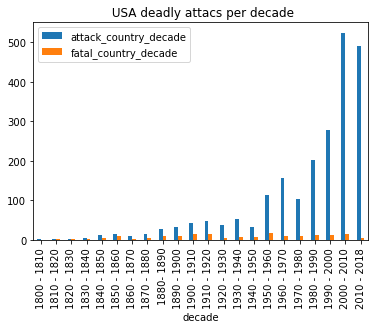

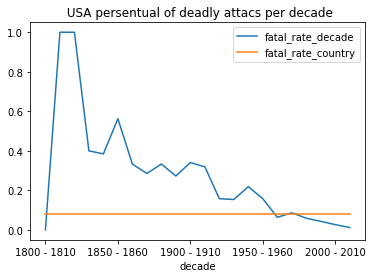

In [51]:
country.sort_values('decade', ascending=True).plot( x='decade',y=['attack_country_decade', 'fatal_country_decade'], kind ='bar', title=' USA deadly attacs per decade') 
country.sort_values('decade', ascending=True).plot( x='decade',y=['fatal_rate_decade', 'fatal_rate_country'], kind ='line', title=' USA persentual of deadly attacs per decade') 

In [59]:
fatal_shark_country_decade60 = shark_decade_country[shark_decade_country['year']>= 1950]
fatal_shark_country_decade60 = fatal_shark_country_decade60[['country', 'decade', 'attacks_country', 'fatal_country', 'attack_country_decade', 'fatal_country_decade']]
fatal_shark_country_decade60= fatal_shark_country_decade60.drop_duplicates()
fatal_shark_country_decade60.sort_values('attacks_country', ascending=False)
fatal_shark_country_decade60['fatal_rate_country'] = np.where(fatal_shark_country_decade60['fatal_country']>0, fatal_shark_country_decade60['fatal_country']/ fatal_shark_country_decade60['attacks_country']  , 0)
fatal_shark_country_decade60['fatal_rate_decade'] = np.where(fatal_shark_country_decade60['fatal_country_decade']>0,fatal_shark_country_decade60['fatal_country_decade'] / fatal_shark_country_decade60['attack_country_decade'] ,0)
fatal_shark_country_decade60.reset_index()
country60 = fatal_shark_country_decade60[fatal_shark_country_decade60['country'] == 'usa']
country60 = pd.DataFrame(country60)
country60

,country,decade,attacks_country,fatal_country,attack_country_decade,fatal_country_decade,fatal_rate_country,fatal_rate_decade
0,usa,2010 - 2018,2207,178,490,6,0.080652,0.012245
490,usa,2000 - 2010,2207,178,524,14,0.080652,0.026718
1014,usa,1990 - 2000,2207,178,278,12,0.080652,0.043165
1292,usa,1980 - 1990,2207,178,203,12,0.080652,0.059113
1495,usa,1970 - 1980,2207,178,104,9,0.080652,0.086538
1599,usa,1960 - 1970,2207,178,157,10,0.080652,0.063694
1756,usa,1950 - 1960,2207,178,114,18,0.080652,0.157895


<AxesSubplot:title={'center':' USA persentual of deadly attacs per decade'}, xlabel='decade'>

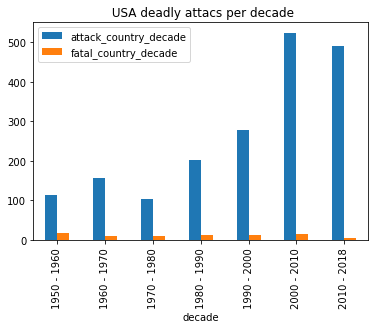

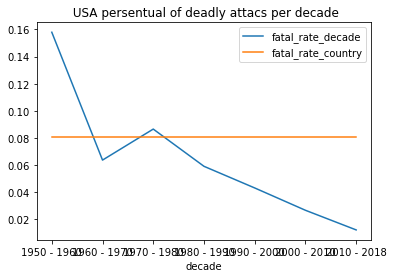

In [60]:
country60.sort_values('decade', ascending=True).plot( x='decade',y=['attack_country_decade', 'fatal_country_decade'], kind ='bar', title=' USA deadly attacs per decade') 
country60.sort_values('decade', ascending=True).plot( x='decade',y=['fatal_rate_decade', 'fatal_rate_country'], kind ='line', title=' USA persentual of deadly attacs per decade')

In [55]:
shark_decade_country.corr()
fatal_shark_country_decade.corr()

,attacks_country,fatal_country,attack_country_decade,fatal_country_decade,fatal_rate_country,fatal_rate_decade
attacks_country,1.000000,0.863386,0.538679,0.543503,-0.514691,-0.100585
fatal_country,0.863386,1.000000,0.471395,0.665746,-0.388843,-0.054402
attack_country_decade,0.538679,0.471395,1.000000,0.510683,-0.283722,-0.195308
fatal_country_decade,0.543503,0.665746,0.510683,1.000000,-0.171060,0.095989
fatal_rate_country,-0.514691,-0.388843,-0.283722,-0.171060,1.000000,0.442214
fatal_rate_decade,-0.100585,-0.054402,-0.195308,0.095989,0.442214,1.000000
